<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Contingency-Table-Chi-Square-Test" data-toc-modified-id="Contingency-Table-Chi-Square-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Contingency Table Chi-Square Test</a></span></li><li><span><a href="#Importing-Modules-and-Loading-Data" data-toc-modified-id="Importing-Modules-and-Loading-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing Modules and Loading Data</a></span></li><li><span><a href="#Chi-Square-Test-on-the-Features-of-the-Data" data-toc-modified-id="Chi-Square-Test-on-the-Features-of-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chi-Square Test on the Features of the Data</a></span></li><li><span><a href="#Measures-of-Association:-Cramer's-V-&amp;-Contingency-Coefficients" data-toc-modified-id="Measures-of-Association:-Cramer's-V-&amp;-Contingency-Coefficients-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Measures of Association: Cramer's V &amp; Contingency Coefficients</a></span></li><li><span><a href="#Spatial-Analysis" data-toc-modified-id="Spatial-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Spatial Analysis</a></span><ul class="toc-item"><li><span><a href="#Kernel-Density" data-toc-modified-id="Kernel-Density-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Kernel Density</a></span></li></ul></li></ul></div>

# Overview

We have so far visualized how each type of crashes (injury and no injury) distributes across the categories of each crash feature or descriptor. In this report, we statistically explore the contribution of each feature to each crash type. More specifically, we perform the chi-square test to check if each feature has an effect or no on the type of crash. 

# Contingency Table Chi-Square Test

To test whether there is an association or not between each crash feature and the crash type, we use contingency table chi-square test. This test considers the following null and alternate hypotheses:
- Null hypothesis $H_0$: A given crash feature has no effect on the crash type;
- Alternate hypothesis $H_a$: A given crash feature has an effect on the crash type.

Given a specific crash feature, the test is performed by first building a table consisting of the numbers of each crash type (Injury or No Injury) observed for each category of the feature, i.e. a cross-tabulation for the crash type and the crash feature. The observed value of each subgroup is then compared with the expected value we could have obtained if the null hypothesis were true. The null hypothesis assumes that the considered crash feature and the crash type are independent. Therefore, under the null hypothesis, the expected value for each category is computed by assuming that the probability of a crash with injury given any category of the feature is the same as the overall probability of a crash with injury, and the probability of a crash with no injury given any category of the feature is the same as the overall probability of a crash with no injury. After having computed the expected ($E_i$) and observed ($O_i$) numbers of crashes for each subgroup, the following test statistic is computed: $$\chi^2=\sum_i\frac{(O_i-E_i)^2}{E_i}$$ This test statistic follows a chi-square distribution, which is used to compute the probability of obtaining a value for the statistic as extreme as the observed one (p-value). If the p-value is small enough, we reject the null hypothesis. 

In this report, in order to perform the chi-square test, we use the following two functions: crosstab() from pandas and chi2_contingency() from scipy.stats. The first functions builds the cross-tabulation between a given crash feature and the crash type. The second function performs the chi-square test on the tabulated data and returns the test statistic and its p-value. We next state the obtained result for each feature.

# Importing Modules and Loading Data

We first import the required modules

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
crashes = pd.read_csv("crashes.csv")

# Chi-Square Test on the Features of the Data

In this section, we perform the chi-square test on each feature of the crashes and then discuss the results.

- **Posted Speed Limit**

We first build the table of frequencies for each possible speed limit and for each crash type.

In [3]:
speed = pd.crosstab(crashes.CRASH_TYPE, crashes.POSTED_SPEED_LIMIT)

In [4]:
speed

POSTED_SPEED_LIMIT,10,15,20,25,30,35,40,45,50,55,60,65,70
CRASH_TYPE,,,,,,,,,,,,,
INJURY AND / OR TOW DUE TO CRASH,101,3239,2184,4165,57666,6990,1196,680,10,141,6,3,1
NO INJURY / DRIVE AWAY,978,32422,8844,15119,188938,15456,1882,1333,34,516,7,2,0


We then perform the chi-square test.

In [5]:
chi2_speed, p_speed, dof, expected = chi2_contingency(speed)
print(chi2_speed, p_speed)

5569.535596244048 0.0


We see that the p-value is very small (close to zero) and in this case we fail to reject the null hypothesis, i.e, we fail to reject that the posted speed limit has no effect on the type of crash that occurred. However, we notice that the test statistic is very large here, which is making the p-value extremely low. One possible reason for the test statistic to be high in this case is that we have a large sample size (the total number of crashes). Therefore, the chi-square test, which is sensitive to large sample size, might not be helping in clarifying the strength of the association between crash type and posted speed limit. Before trying another but more insightful measure, we continue performing the chi-square test on the remaining features.

- **Traffic Control Device** 

In [6]:
device = pd.crosstab(crashes.CRASH_TYPE, crashes.TRAFFIC_CONTROL_DEVICE)

In [7]:
chi2_device, p_device, dof, expected = chi2_contingency(device)
print(chi2_device, p_device)

5063.420455233679 0.0


- **Weather Condition**

In [8]:
weather = pd.crosstab(crashes.CRASH_TYPE, crashes.WEATHER_CONDITION)

In [9]:
chi2_weather, p_weather, dof, expected = chi2_contingency(weather)
print(chi2_weather, p_weather)

1119.7261719166088 2.103655474948256e-236


- **Lighting Condition**

In [10]:
light = pd.crosstab(crashes.CRASH_TYPE, crashes.LIGHTING_CONDITION)

In [11]:
chi2_light, p_light, dof, expected = chi2_contingency(light)
print(chi2_light, p_light)

6025.15421353463 0.0


- **Road Alignment**

In [12]:
align = pd.crosstab(crashes.CRASH_TYPE, crashes.ALIGNMENT)

In [13]:
chi2_align, p_align, dof, expected = chi2_contingency(align)
print(chi2_align, p_align)

1094.0577828746293 2.587858530236764e-234


- **Road Condition**

In [14]:
road = pd.crosstab(crashes.CRASH_TYPE, crashes.ROADWAY_SURFACE_COND)

In [15]:
chi2_road, p_road, dof, expected = chi2_contingency(road)
print(chi2_road, p_road)

1410.240649415058 4.159226906542667e-304


- **Collision Type**

In [16]:
coll = pd.crosstab(crashes.CRASH_TYPE, crashes.FIRST_CRASH_TYPE)

In [17]:
chi2_coll, p_coll, dof, expected = chi2_contingency(coll)
print(chi2_coll, p_coll)

43081.16185838227 0.0


- **Trafficway Type**

In [18]:
tr = pd.crosstab(crashes.CRASH_TYPE, crashes.TRAFFICWAY_TYPE)

In [19]:
chi2_tr, p_tr, dof, expected = chi2_contingency(tr)
print(chi2_tr, p_tr)

9538.105562426485 0.0


- **Contributory Cause**

In [20]:
cause = pd.crosstab(crashes.CRASH_TYPE, crashes.PRIM_CONTRIBUTORY_CAUSE)

In [21]:
chi2_cause, p_cause, dof, expected = chi2_contingency(cause)
print(chi2_cause, p_cause)

31993.29780516069 0.0


- **Crash Hour**

In [22]:
hour = pd.crosstab(crashes.CRASH_TYPE, crashes.CRASH_HOUR)

In [23]:
chi2_hour, p_hour, dof, expected = chi2_contingency(hour)
print(chi2_hour, p_hour)

6786.549164952034 0.0


- **Crash Day**

In [24]:
day = pd.crosstab(crashes.CRASH_TYPE, crashes.CRASH_DAY_OF_WEEK)

In [25]:
chi2_day, p_day, dof, expected = chi2_contingency(day)
print(chi2_day, p_day)

538.5418733470319 4.1657452622756525e-113


- **Crash Month**

In [26]:
month = pd.crosstab(crashes.CRASH_TYPE, crashes.CRASH_MONTH)

In [27]:
chi2_month, p_month, dof, expected = chi2_contingency(month)
print(chi2_month, p_month)

182.00954823875338 3.943028640846957e-33


We see that for all features, we have large test statistics and low p-values. This might be because of the large sample size, to which the chi-square test is sensitive. To gain more insight into the relationship between the crash type and each feature, we compute two different measures of association based on the chi-square test statistic.

# Measures of Association: Cramer's V & Contingency Coefficients

To better measure the association between crash type and the crash features, we compute, using the chi-square test statistic, two measures of association: Cramer's V (with bias correction) and Contingency coefficients. Both can take values between 0 and 1, where a value close to 0 means little or no association and a value close to 1 means strong association. For details on how to compute each coefficient, check the following links: http://uregina.ca/~gingrich/ch11a.pdf, http://stats.lse.ac.uk/bergsma/pdf/cramerV3.pdf, https://www.statisticshowto.datasciencecentral.com/contingency-coefficient/, https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/#cramers%20v%20correlation

We first define the function that we are going to use to compute Cramer's V (with bias correction) and contingency coefficients.

In [28]:
# This function computes the Cramer's V coefficient
# Inputs: chi2: chi-square statistic, table: cross tabulated data


def cram_cont(chi2, table):
    ntot = table.sum().sum()
    nrow, ncol = table.shape
    phi_sqr = chi2/ntot
    phi_sqr_tilde = np.maximum(0, phi_sqr-(nrow-1)*(ncol-1)/(ntot-1))
    ncol_tilde = ncol-((ncol-1)**2)/((ntot-1))
    nrow_tilde = nrow-((nrow-1)**2)/((ntot-1))
    cramer = np.sqrt(phi_sqr_tilde/np.minimum(ncol_tilde-1, nrow_tilde-1))
    cont = np.sqrt(chi2/(chi2+ntot))
    return (cramer, cont)

We now compute these coefficients for each feature and summarize all the results in one table.

In [29]:
# Create the list of feature names to loop over the features
names = ["speed", "device", "weather", "light",
         "align", "coll", "tr", "cause", "hour", "day", "month"]
tables = [speed, device, weather, light,
          align, coll, tr, cause, hour, day, month]

# Initialize an empty array that will have the results for each feature
values = np.empty(shape=[4, len(names)])
col = 0
# Loop over the features and save chi2, pvalue, cramer's v and contingency coefs
for name, table in zip(names, tables):
    values[0][col] = eval("chi2_"+name)
    values[1][col] = eval("p_"+name)
    cramer, cont = cram_cont(eval("chi2_"+name), table)
    values[2][col] = cramer
    values[3][col] = cont
    col = col + 1

# Create a dataframe for the results 
results = pd.DataFrame(values)
names[5] = "collision"
names[6] = "trafficway type"
results.columns = names
results.rename(index={0: "Chi2", 1: "P-val",
                      2: "Cramer's V", 3: "Contingency"}, inplace=True)
results

,speed,device,weather,light,align,collision,trafficway type,cause,hour,day,month
Chi2,5569.535596,5063.420455,1.119726e+03,6025.154214,1.094058e+03,43081.161858,9538.105562,31993.297805,6786.549165,5.385419e+02,1.820095e+02
P-val,0.000000,0.000000,2.103655e-236,0.000000,2.587859e-234,0.000000,0.000000,0.000000,0.000000,4.165745e-113,3.943029e-33
Cramer's V,0.127492,0.121500,5.702191e-02,0.132704,5.643757e-02,0.354896,0.166856,0.305708,0.140647,3.946569e-02,2.236418e-02
Contingency,0.126603,0.120801,5.713315e-02,0.131593,5.647661e-02,0.334516,0.164740,0.292515,0.139508,3.965612e-02,2.306608e-02


We first see that the Cramer's V and contingency coefficients show similar values. Moreover, we notice the following:
- collision type and contributory cause have the two highest Cramer's V coefficient (0.354896 and 0.305708 respectively). This result is consistent with the visualizations where with these two features, we noticed the greater differences in the distribution of each crash type; 
- trafficway type (0.166856) comes next, then hour (0.140647), light, speed and device (0.132704, 0.127492, 0.1215 respectively). These features have close Cramer's V and reflect the possible presence of relationship between these features and the crash type;
- weather conditions, road alignment, day and month are the features with lowest Cramer's V, which might imply weaker relationship between those features and the crash type.

# Spatial Analysis

In this section, we explore the distribution of crashes over the area of the city. More specifically, we are interested in checking for any patterns in the spatial occurrence of the crashes, and if these patterns are different between the two types of crashes. 

## Kernel Density

One of the ways to analyze data distribution over the area is to plot the Kernel Density Estimation of the crashes for each crash type. 

In [30]:
pt_no_injury = crashes.loc[crashes.
                           CRASH_TYPE != 'INJURY AND / OR TOW DUE TO CRASH',
                           ['LATITUDE', 'LONGITUDE']]
pt_injury = crashes.loc[crashes.CRASH_TYPE ==
                        'INJURY AND / OR TOW DUE TO CRASH',
                        ['LATITUDE', 'LONGITUDE']]
# Create the points from the latitude and longitude information
gdf_injury = gpd.GeoDataFrame(pt_injury, geometry=[Point(
    xy) for xy in zip(pt_injury['LONGITUDE'], pt_injury['LATITUDE'])])
gdf_injury = gdf_injury[(gdf_injury.LATITUDE.notnull())
                              & (gdf_injury.LONGITUDE.notnull())]
gdf_injury = gdf_injury[(gdf_injury.LATITUDE != 0)
                              & (gdf_injury.LONGITUDE != 0)]

gdf_no_injury = gpd.GeoDataFrame(pt_no_injury, geometry=[Point(
    xy) for xy in zip(pt_no_injury['LONGITUDE'], pt_no_injury['LATITUDE'])])

gdf_no_injury = gdf_no_injury[(gdf_no_injury.LATITUDE.notnull())
                              & (gdf_no_injury.LONGITUDE.notnull())]
gdf_no_injury = gdf_no_injury[(gdf_no_injury.LATITUDE != 0)
                              & (gdf_no_injury.LONGITUDE != 0)]

In [32]:
 df = gpd.read_file('chicago.geojson')

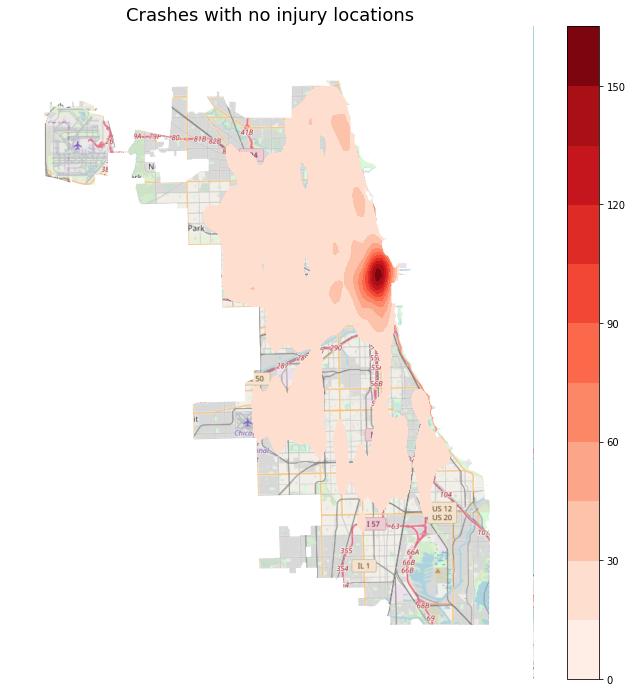

In [33]:
ax = gplt.kdeplot(
    gdf_no_injury, cmap='Reds', projection=gcrs.WebMercator(), figsize=(12, 12),
    shade=True, clip=df.geometry, cbar=True
)

gplt.webmap(gdf_no_injury, ax=ax)
plt.title('Crashes with no injury locations', fontsize=18)

fig = plt.gcf()
plt.show()

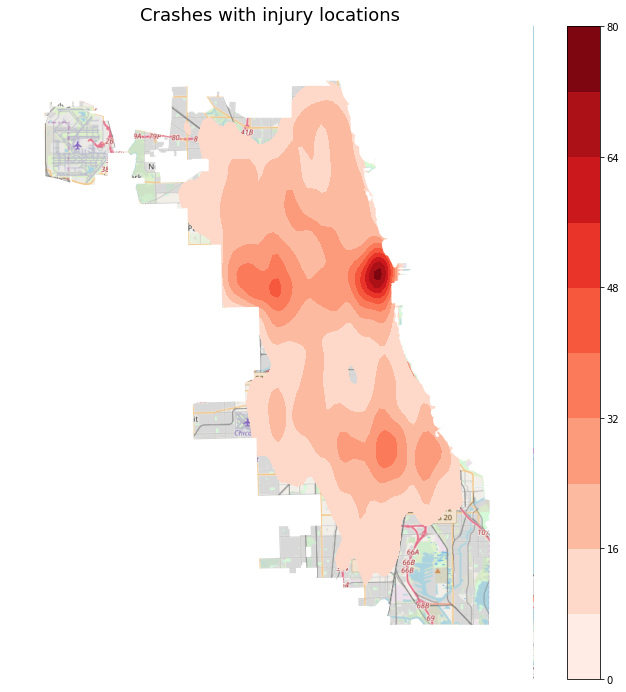

In [34]:
ax2 = gplt.kdeplot(
    gdf_injury, cmap='Reds', projection=gcrs.WebMercator(), figsize=(12, 12),shade=True, cbar=True, clip=df.geometry)

gplt.webmap(gdf_injury, ax=ax2)
plt.title('Crashes with injury locations', fontsize=18)

fig2 = plt.gcf()
plt.show()